<a href="https://colab.research.google.com/github/HaniaRangel/SIM_MAT/blob/main/Repaso_M%C3%B3dulo_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Repaso - Módulo 2**  
### *Hania Alexa Rangel Aguilar | 746409*

## Problema 1. Simulación Montecarlo usando Caminata aleatoria

Se desea conocer el estado final de un proceso hipotético definido como una Máquina de estados. Este proceso cuenta con los estados: **A** y **B**. El proceso se define de la siguiente manera:
* Estando en el estado **A**, 4 de cada 7 operaciones cambia al estado **B**, el resto de casos se mantiene en el estado **A**.
* Estando en el estado **B**, 1 de cada 3 operaciones cambia al estado **A**, el resto de casos se mantiene en el estado **B**.

Respresentado por el siguiente diagrama

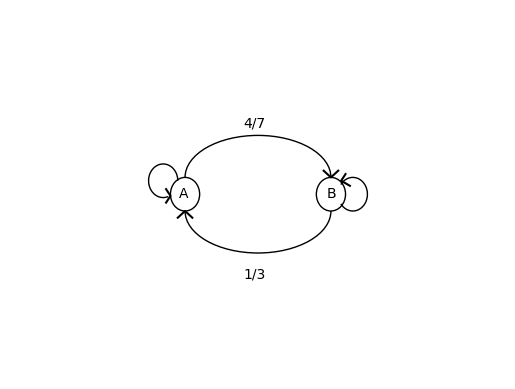

In [92]:
# @title
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

C1 = patches.Circle((-0.5, 0), 0.1,fc='None',color='k')
C2 = patches.Circle((0.5, 0), 0.1,fc='None',color='k')
B1 = patches.Arc((0, 0.1), 1,0.5,theta2=180,fc='None',color='k')
B2 = patches.Arc((0, -0.1), 1,0.5,theta1=180,fc='None',color='k')
A1 = patches.Arc((-0.65, 0.08), 0.2,0.2,theta2=290,fc='None',color='k')
A2 = patches.Arc((0.65, 0), 0.2,0.2,theta1=-145,theta2=145,fc='None',color='k')
ax = plt.gca()
ax.add_artist(B1)
ax.add_artist(B2)
ax.add_artist(C1)
ax.add_artist(C2)
ax.add_artist(A1)
ax.add_artist(A2)

plt.plot([0.45,0.5,0.55],[0.14,0.1,0.14],'k')
plt.plot([-0.45,-0.5,-0.55],[-0.14,-0.1,-0.14],'k')
plt.plot([-0.63,-0.6,-0.63],[0.03,-0.01,-0.05],'k')
plt.plot([0.63,0.57,0.6],[0.05,0.08,0.12],'k')

plt.text(-0.54,-0.02,'A')
plt.text(0.47,-0.02,'B')
plt.text(-0.1,0.4,'4/7')
plt.text(-0.1,-0.5,'1/3')

plt.axis([-1.7,1.7,-1.1,1.1])
plt.axis('off')
plt.show()

* Si el proceso parte del estado **A**, y se ejecutan 50 operaciones, ¿Cuál es la probabilidad de que el proceso finalice en el estado **B**? Usando el método Montecarlo con 100000 escenarios.

---
Considerando los siguientes valores para cada estado:
$$
A=0\\
B=1\\
$$
Le asignamos una probabilidad y una suma a cada transición:  
|Estado inicial|Estado final|Probabilidad|Transición|
|-|-|-|-|
|A|A|3/7|0|
|A|B|4/7|+1|
|B|A|1/3|-1|
|B|B|2/3|0|

In [93]:
import numpy as np
import matplotlib.pyplot as plt

In [94]:
def maquina(estado0,operaciones):
  t=[-1,0,1]
  # operaciones=50
  # estado=0
  estado=estado0
  for i in range(operaciones):
    if estado==0:
      p=[0,3/7,4/7] # Las probabilidades deben tener el mismo tamaño que las transiciones y sus elementos deben sumar 1
    else:
      p=[1/3,2/3,0]
    estado+=np.random.choice(t,p=p)
  return estado

In [95]:
maquina(0,50) #Resultado 1 (A) o 0 (B)

np.int64(1)

In [96]:
# Evaluamos cuántos escenarios quedan en B en 100000 escenarios
B=0
for i in range(100000):
  B+=maquina(0,50)==1 # Buscamos cuántos escenarios terminan en B
B/100000

np.float64(0.63)

**Respuesta:**  
Hay un $63\%$ de probabilidad de que la máquina termine en el estado $B$ después de 50 operaciónes.

---
## Problema 2. Simulación de escenarios futuros

Evaluaremos dos compañías con tendencias más o menos similares (Apple y Microsoft) veremos cuál tiene más probabilidades de darnos un interés deseado.

Además, descargaremos los datos del año 2025 para ver si el análisis concuerda.

Descargue datos para Apple y Microsoft desde enero de 2015 a diciembre de 2024 y muestre sus gráficas.

In [97]:
import numpy as np
import pandas as pd
import yfinance as yf

/tmp/ipython-input-3001625138.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data=yf.download(tickers,start='2015-01-01',end='2024-12-31')['Close']
[*********************100%***********************]  2 of 2 completed


<Axes: xlabel='Date'>

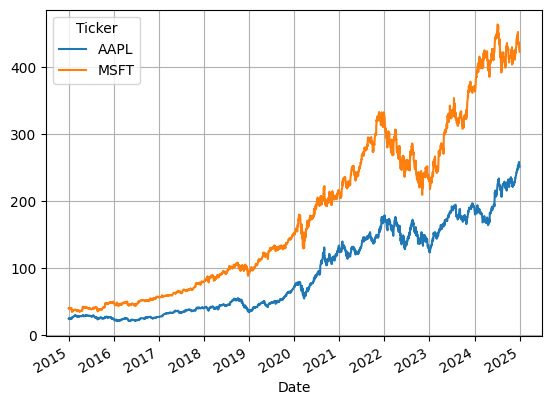

In [120]:
# AAPL -> Apple
# MSFT -> Microsoft
tickers=['AAPL','MSFT']
data=yf.download(tickers,start='2015-01-01',end='2024-12-31')['Close']
data.plot(grid=True)

Calcule los rendimientos diarios junto con sus características estadísticas

<Axes: xlabel='Date'>

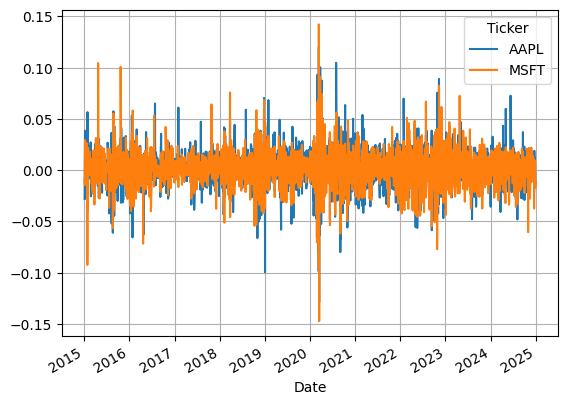

In [121]:
#Rendimientos diarios
delta=data.pct_change().dropna()
delta.plot(grid=True)

array([[<Axes: title={'center': 'AAPL'}>,
        <Axes: title={'center': 'MSFT'}>]], dtype=object)

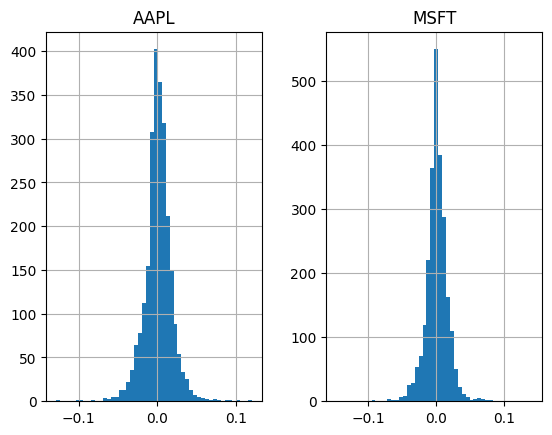

In [122]:
#Histograma de rendimientos diarios
delta.hist(bins=50,grid=True)

Simule 10000 escenarios de rendimientos diarios para todo el año 2025 (para cada una de las empresas).

In [123]:
def simulacion(delta,marca,N_dias,N_escenarios):
  #N_dias=365 -> Simulamos 2025 (1 año)
  #N_escenarios=10000
  delta_marca=np.random.normal(delta[marca].mean(),delta[marca].std(),(N_dias,N_escenarios))
  rango_tiempo=pd.date_range('2025-01-01',periods=N_dias)
  delta_marca=pd.DataFrame(delta_marca,index=rango_tiempo)
  return delta_marca

In [124]:
simulacion(delta,'AAPL',365,10000)

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
2025-01-01,-0.034042,-0.011485,0.008913,-0.016656,0.003363,0.001218,-0.027349,0.014642,-0.016051,0.015738,...,0.013932,-0.021161,0.010394,0.017934,-0.003106,-0.004319,-0.009264,-0.012949,0.004589,0.010376
2025-01-02,-0.023300,0.005194,0.001610,0.002765,-0.012294,0.025691,0.019429,-0.028651,-0.012848,-0.009045,...,-0.019881,0.004856,0.002467,0.007722,0.037673,-0.017270,-0.009126,-0.009447,-0.014305,-0.011796
2025-01-03,-0.021578,-0.004843,-0.000286,0.017222,0.015424,-0.005524,0.016838,-0.000205,0.028217,0.028771,...,0.008501,-0.028653,0.002487,-0.014102,0.005634,-0.029680,0.004013,0.020319,0.000149,0.022969
2025-01-04,-0.011391,0.017429,-0.006090,0.029431,-0.000192,0.014899,-0.009918,-0.018112,-0.024102,0.050723,...,0.004240,0.014640,-0.011732,-0.012630,0.023278,0.024101,0.015564,-0.010598,0.011921,0.009000
2025-01-05,-0.003365,-0.013616,0.038314,-0.028423,-0.007150,-0.018888,-0.022980,-0.028722,0.000051,0.004335,...,-0.009881,0.015403,-0.017527,0.008704,0.002145,-0.030435,0.002368,0.018315,0.007527,-0.021200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-12-27,-0.020744,0.012622,0.024425,0.021874,-0.002864,-0.013411,-0.006640,0.027098,-0.003543,-0.018797,...,0.008772,0.017370,-0.008510,0.006063,0.023320,0.019936,0.015379,0.003333,-0.023303,0.001158
2025-12-28,0.011319,0.020538,-0.034389,-0.015367,-0.003671,0.017728,0.036086,0.000434,0.008527,-0.003364,...,0.008913,-0.000619,0.009448,0.009064,-0.020185,-0.001802,0.002659,0.048758,0.033161,-0.013296
2025-12-29,-0.010419,0.018775,-0.037433,-0.038700,0.006047,0.008437,0.043670,0.002305,-0.003560,-0.003323,...,-0.006319,-0.010543,0.015869,-0.012131,-0.029014,0.013643,-0.020770,-0.020882,0.015201,0.008308
2025-12-30,-0.001087,0.018599,-0.011613,-0.042554,-0.002202,-0.028276,0.001138,0.021537,0.017829,0.006009,...,0.002049,0.020525,-0.000986,0.007318,0.008418,-0.026924,-0.006951,0.020244,0.030015,-0.007625


In [125]:
simulacion(delta,'MSFT',365,10000)

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
2025-01-01,0.017418,0.028645,0.025291,0.014416,-0.002830,0.014255,0.015705,-0.028461,-0.001438,-0.017987,...,0.014650,0.016322,0.000609,-0.003454,0.003064,-0.000978,0.007776,-1.990705e-02,-0.017488,0.007314
2025-01-02,-0.011927,-0.006012,0.008665,-0.022597,-0.000592,-0.011935,0.017256,0.017453,0.001035,0.027500,...,-0.001915,0.008706,0.003088,-0.023331,0.004314,-0.008161,-0.022175,1.002724e-02,0.025565,0.001041
2025-01-03,0.020328,0.000207,0.003147,0.022355,-0.007913,-0.003481,0.002642,-0.010933,-0.027761,-0.007961,...,0.024304,0.002219,0.002437,-0.010508,-0.022039,-0.005147,-0.011040,-8.796692e-03,0.021533,0.005692
2025-01-04,-0.006728,0.011961,-0.015137,0.011016,0.007174,0.007113,0.010518,-0.014457,0.019841,0.020106,...,0.041905,0.029888,0.020806,0.022100,0.016772,0.004462,0.008537,-9.592466e-03,0.015687,0.004655
2025-01-05,0.007787,-0.010921,0.019857,0.002136,-0.005407,0.011148,-0.011854,-0.006835,-0.011269,-0.021108,...,0.001372,0.013020,0.002518,-0.010257,0.022284,0.012429,-0.000768,5.969353e-03,-0.037787,0.027949
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-12-27,0.025035,0.009148,0.000935,-0.012793,-0.002598,-0.021247,-0.015454,0.011386,-0.007197,-0.003869,...,0.040615,0.019580,0.003159,0.018607,0.011201,0.018380,-0.001351,3.277639e-02,-0.031628,0.020881
2025-12-28,-0.011660,-0.019294,0.005510,0.007903,-0.006232,-0.000582,0.030575,0.019031,-0.008297,0.009779,...,0.003557,-0.028120,-0.006472,-0.003159,0.018723,-0.022924,-0.012442,6.451585e-07,-0.006740,0.019790
2025-12-29,-0.010479,-0.021911,-0.015145,-0.013856,-0.007770,0.007318,0.005610,-0.025647,-0.006893,0.019898,...,-0.027441,0.004292,0.012912,-0.016279,-0.006951,-0.008952,0.023561,1.468603e-02,-0.018220,-0.008656
2025-12-30,-0.004919,-0.007770,0.003239,0.013037,-0.025308,0.012931,-0.012458,0.012102,-0.016023,0.014857,...,-0.008874,-0.027306,0.022211,-0.027564,0.022442,-0.004835,0.010867,1.235339e-02,0.013005,0.020097


Calcule los precios con base en los rendimientos simulados

In [126]:
def precios(delta,marca,N_dias,N_escenarios):
  delta_marca=simulacion(delta,marca,N_dias,N_escenarios)
  precios_marca=data[marca].iloc[-1]*(delta_marca+1).cumprod()
  return precios_marca

In [127]:
precios(delta,'AAPL',365,10000)

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
2025-01-01,250.655503,248.099156,251.352460,253.161618,249.555719,262.042084,254.428865,250.008368,252.706513,248.343133,...,244.530132,252.239605,255.706052,256.343450,249.268493,255.391965,255.935609,254.272747,257.323995,257.964510
2025-01-02,246.854472,251.003812,255.423241,257.154647,250.448071,259.466380,258.557090,254.354568,252.327011,248.426309,...,246.115161,256.109016,255.030601,266.079556,251.061578,251.039040,253.366512,246.908317,257.101566,263.245028
2025-01-03,254.271374,248.163618,260.577471,259.391472,251.717061,259.385345,267.380880,254.210831,249.681026,245.491682,...,239.090720,253.273915,258.683279,266.967149,248.142687,245.613675,252.264615,246.314619,253.203212,261.531422
2025-01-04,259.665846,250.057603,253.337635,258.447596,243.358735,258.926032,263.751037,252.707536,247.493282,246.276500,...,233.561429,247.989743,258.692760,260.355689,247.551678,249.555246,255.756921,242.588014,248.351905,260.884153
2025-01-05,253.217103,251.843883,253.665529,261.294548,238.067132,258.214557,270.273883,249.936076,253.347574,245.024078,...,228.549623,244.505633,263.265319,264.562524,243.466847,246.912673,249.865570,246.987792,244.913624,264.314157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-12-27,184.928379,350.795429,223.315251,230.009820,646.301653,542.964207,229.304664,231.134542,279.356715,526.316092,...,376.033027,402.074294,317.707486,228.087438,342.695790,554.113233,366.095505,356.450226,355.222682,356.025386
2025-12-28,184.364876,346.489021,225.509169,228.939601,636.119657,561.151503,229.395220,232.295840,281.079799,520.316287,...,369.582271,399.928153,318.449630,231.194677,346.408811,569.045561,363.553627,358.685472,354.471440,350.842143
2025-12-29,178.005714,346.060209,225.738706,235.193526,637.930829,540.813940,231.824505,230.923338,275.179720,521.724666,...,353.616447,388.454303,310.676692,236.014310,344.054236,587.031116,353.251489,362.272449,361.872409,350.758131
2025-12-30,172.965873,348.896610,225.115681,238.548075,659.207237,534.550036,240.273613,234.512273,271.738971,499.206741,...,343.825978,388.503994,305.809878,243.783675,345.496261,588.476791,353.728472,360.914104,345.341070,362.701535


In [128]:
precios(delta,'MSFT',365,10000)

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
2025-01-01,417.677878,434.732475,424.933891,426.533568,418.274443,417.412686,426.264083,424.717118,431.660156,430.837838,...,406.018953,424.917556,415.716129,438.532676,425.777210,418.497447,419.197645,428.233706,419.920741,425.263855
2025-01-02,423.245332,455.315805,423.017573,419.686893,409.958231,415.452967,423.200347,423.006212,436.130211,434.638363,...,398.356059,428.215913,415.667163,430.639708,425.547476,415.113077,418.242633,428.363084,417.362370,434.154453
2025-01-03,414.808447,452.708086,418.266647,422.744878,408.454396,402.612923,415.109288,417.224906,433.132521,415.974190,...,389.621649,423.162012,400.999506,423.938825,417.095440,419.298728,433.311909,434.174152,425.470925,432.760929
2025-01-04,416.990947,437.181866,424.222165,418.676272,398.148705,412.531114,419.258831,420.770992,431.907299,420.546841,...,382.672577,435.357284,409.249098,423.277996,425.245849,415.700786,438.363009,433.628390,431.141634,426.748489
2025-01-05,419.916665,428.958497,426.497190,426.736171,396.383221,405.255450,431.547662,424.217639,424.652949,421.740235,...,386.057553,449.368771,410.982930,427.566154,427.782529,421.060866,424.026833,432.316905,438.558640,424.590734
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-12-27,492.129297,493.361465,429.311778,427.770497,313.555154,496.623764,631.930825,641.125221,751.973820,556.562236,...,617.003027,492.625404,620.104226,371.152425,430.639790,1123.275619,776.410340,1026.641423,1032.219925,606.926012
2025-12-28,494.839451,485.865735,428.726557,429.220933,309.576911,480.539779,626.809889,650.653436,751.125734,570.274287,...,631.626152,509.186818,627.209335,376.903423,420.839927,1137.954237,778.809205,1068.445884,1016.436223,601.265050
2025-12-29,495.295461,484.279278,430.801945,421.179191,306.095162,463.263015,616.150837,635.836137,750.514394,570.557171,...,636.449408,509.884101,621.880735,378.668781,417.084753,1153.371649,769.241244,1071.492403,1047.587503,589.068163
2025-12-30,497.782301,476.263843,434.820947,424.947004,311.708155,449.388060,619.949062,637.334653,748.410080,570.157352,...,625.426536,521.922316,619.778801,387.252203,416.881773,1151.121216,756.957617,1069.524392,1028.980282,590.984478


Calcule la probabilidad de obtener un retorno del 20% para ambas marcas.

In [129]:
def ProbPorc(delta,marca,N_dias,N_escenarios,porc):
  precios_marca=precios(delta,marca,N_dias,N_escenarios)
  # Variable de Bernoulli (Cuántos escenarios satisfacen la condición buscada)
  B_marca=precios_marca>data[marca].iloc[-1]*(1+porc/100)
  proba_marca=B_marca.mean(axis=1)
  return proba_marca.plot(grid=True)

<Axes: >

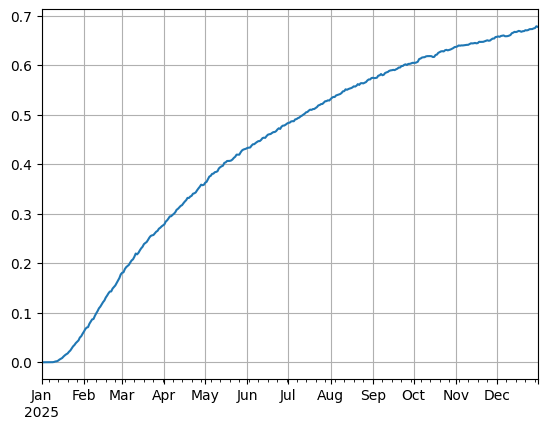

In [130]:
ProbPorc(delta,'AAPL',365,10000,20)

<Axes: >

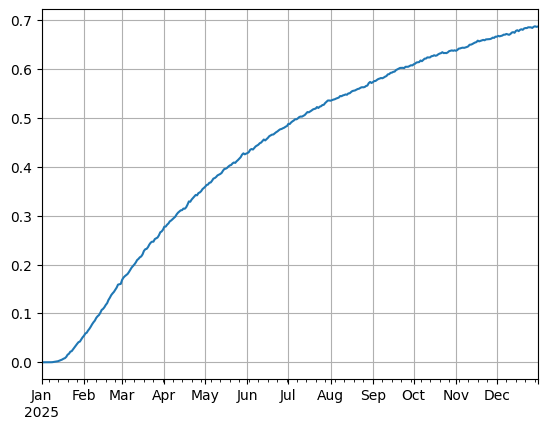

In [131]:
ProbPorc(delta,'MSFT',365,10000,20)

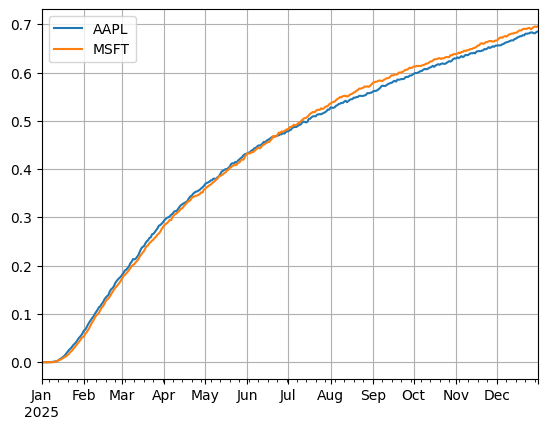

In [136]:
# Usando función obtenida en clase:
# Definimos una función que, dados los datos extraídos, regrese el arreglo de probabilidades del ticker dado como argumento
def simulacion(data,ticker,dia_inicial,N_dias,N_escenarios):
  delta=data.pct_change().dropna()
  delta_sim=np.random.normal(delta[ticker].mean(),delta[ticker].std(),(N_dias,N_escenarios))
  rango_tiempo=pd.date_range(dia_inicial,periods=N_dias)
  delta_sim=pd.DataFrame(delta_sim,index=rango_tiempo)
  precios_simulados=data[ticker].iloc[-1]*((delta_sim+1).cumprod())
  B=precios_simulados>data[ticker].iloc[-1]*1.2
  return B.mean(axis=1)

simulacion(data,'AAPL','2025-01-01',365,10000).plot(grid=True,label='AAPL')
simulacion(data,'MSFT','2025-01-01',365,10000).plot(grid=True,label='MSFT')
plt.legend()

Finalmente, grafique los datos reales del 2025 para ver que tan acertado fue nuestro análisis.

/tmp/ipython-input-2002380910.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data=yf.download(tickers,start='2025-01-01',end='2025-12-31')['Close']
[*********************100%***********************]  2 of 2 completed


<Axes: xlabel='Date'>

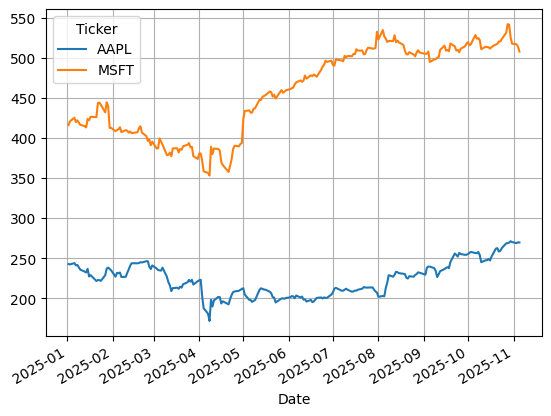

In [111]:
data=yf.download(tickers,start='2025-01-01',end='2025-12-31')['Close']
data.plot(grid=True)

En ambas marcas obtuvimos un poco menos de $70\%$ de probabilidad de que haya un retorno de 20%, lo cual se cumplió para Microsoft y Apple estubo cerca de lograrlo.